# C1_성민지_Python을 이용한 실습_220805

---

In [62]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### Python을 이용한 정규성 검정 실습 (265쪽)

In [63]:
dat = pd.read_csv('/home/piai/minji/dataset/2sample_t_test.csv', encoding = 'euc-kr')
dat = dat.dropna(axis = 0)

print(dat.shape)
dat

(10, 4)


,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1
5,71.5,72.7,71.5,1
6,74.5,66.9,74.5,1
7,77.5,70.2,77.5,1
8,76.4,74.4,76.4,1
9,77.7,70.1,77.7,1


In [64]:
# Mat_A에 대한 정규성 검정

stat_A, pval_B = shapiro(dat['Mat_A'])

print("H0 : 정규성을 만족한다.")
print("H1 : 정규성을 만족하지 않는다.")
print("")
print("----------- Shapiro-Wilk 정규성 검정 결과 -----------")
print("z : {}".format(stat_A))
print("p : {}".format(pval_A))

H0 : 정규성을 만족한다.
H1 : 정규성을 만족하지 않는다.

----------- Shapiro-Wilk 정규성 검정 결과 -----------
z : 0.9062636494636536
p : 0.2562994360923767


검정통계량 0.906에 대한 유의확률 0.256 > 0.05이므로 귀무가설을 채택한다. 즉, Mat_A는 정규성을 만족한다.

In [65]:
# Mat_B에 대한 정규성 검정

stat_B, pval_B = shapiro(dat['Mat_B'])

print("H0 : 정규성을 만족한다.")
print("H1 : 정규성을 만족하지 않는다.")
print("")
print("----------- Shapiro-Wilk 정규성 검정 결과 -----------")
print("z : {}".format(stat_B))
print("p : {}".format(pval_B))

H0 : 정규성을 만족한다.
H1 : 정규성을 만족하지 않는다.

----------- Shapiro-Wilk 정규성 검정 결과 -----------
z : 0.9729753732681274
p : 0.9169777035713196


검정통계량 0.973에 대한 유의확률 0.917 > 0.05이므로 귀무가설을 채택한다. 즉, Mat_B는 정규성을 만족한다.

### Python을 이용한 구간추정 실습 (268쪽)

In [66]:
dat = pd.DataFrame({"weight" : [18, 18, 20, 21, 20, 23, 19, 18, 17, 21,
                               22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})

print(dat.shape)
dat.head()

(20, 1)


,weight
0,18
1,18
2,20
3,21
4,20


In [67]:
sigma = 3.8

lower, upper = stats.norm.interval(0.95, loc = np.mean(dat), scale = sigma / np.sqrt(dat.shape[0]))
print("신뢰구간 : ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([17.83], [21.17])


/home/piai/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


신품종 감자의 평균 무게에 대한 95% 신뢰구간은 (17.83, 21.17)이다.

### Python을 이용한 구간추정 실습 (271쪽)

In [68]:
dat = pd.DataFrame({'Coil' : [73, 71, 74, 69, 70, 73, 70, 68, 75, 72,
                             70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})

print(dat.shape)
dat.head()

(20, 1)


,Coil
0,73
1,71
2,74
3,69
4,70


In [69]:
lower, upper = stats.t.interval(0.95, len(dat) - 1, loc = np.mean(dat), scale = scipy.stats.sem(dat))
print("신뢰구간 : ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([70.6], [72.4])


/home/piai/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


코일의 평균 인장강도에 대한 95% 신뢰구간은 (70.6, 72.4)이다.

### Python을 이용한 가설검정 (299쪽)

In [70]:
df = pd.DataFrame({'A' : [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
                  'B' : [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

print(df.shape)
df.head()

(8, 2)


,A,B
0,1.883,1.435
1,1.715,1.572
2,1.799,1.486
3,1.768,1.511
4,1.711,1.457


In [71]:
# 정규성 검정

statistic1, p1 = stats.shapiro(df['A'])
print("----------- A에 대한 정규성 검정 -----------")
print("statistic = {}, p-value = {}".format(statistic1, p1))
print("")

----------- A에 대한 정규성 검정 -----------
statistic = 0.8425756096839905, p-value = 0.08004552870988846



검정통계량 0.843에 대한 유의확률 0.08 > 0.05이므로 유의수준 5% 하에서 귀무가설을 채택한다. 따라서, A공급자의 제품 두께 데이터는 정규성을 만족한다고 할 수 있다.

In [72]:
# 정규성 검정

statistic2, p2 = stats.shapiro(df['B'])
print("----------- B에 대한 정규성 검정 -----------")
print("statistic = {}, p-value = {}".format(statistic2, p2))

----------- B에 대한 정규성 검정 -----------
statistic = 0.7734811902046204, p-value = 0.014793740585446358


검정통계량 0.774에 대한 유의확률 0.01 < 0.05이므로 유의수준 5% 하에서 귀무가설을 기각한다. 따라서, B공급자의 제품 두께 데이터는 정규성을 만족한다고 할 수 없다.

In [73]:
# 등분산성 검정

from scipy.stats import bartlett

statistic, p = stats.bartlett(df['A'], df['B'])
print("----------- A와 B에 대한 등분산성 검정 -----------")
print("statistic = {}, p-value = {}".format(statistic, p))

----------- A와 B에 대한 등분산성 검정 -----------
statistic = 0.42411436523132123, p-value = 0.5148911629500761


검정통계량 0.424에 대한 유의확률 0.514 > 0.05이므로 유의수준 5% 하에서 귀무가설을 채택한다. 즉, 두 집단의 데이터는 등분산성을 만족한다.

In [74]:
# 대응표본 t-검정

statistic, p = stats.ttest_ind(df['A'], df['B'])
print("----------- 2-Sample t-test -----------")
print("t : {}".format(statistic.round(5)))
print("p : {}".format(p.round(5)))

----------- 2-Sample t-test -----------
t : 1.69954
p : 0.11132


- H0 : A공급자와 B공급자 간 모평균에 차이가 없다.
- H1 : A공급자와 B공급자 간 모평균에 차이가 있다.


검정통계량 1.699에 대한 유의확률 0.11 >0.05이므로 귀무가설을 채택한다. 즉, 두 공급자의 제품 간 모평균은 차이가 없다고 볼 수 있다.

### Python을 이용한 가설검정 실습 (302쪽)

In [75]:
before = pd.DataFrame({'before' : [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
after = pd.DataFrame({'after' : [710, 580, 787, 712, 750, 600, 782, 670, 790, 780]})

In [76]:
# 대응표본 t-검정

t, p = stats.ttest_rel(before, after)

print("------- Paired t-test -------")
print("t: {}".format(t.round(3)))
print("p: {}".format(p.round(3)))

------- Paired t-test -------
t: [-1.904]
p: [0.089]


- H0 : 학원 가기 전후 간 회사원들의 성적 평균에 차이가 없다.
- H1 : 학원 가기 전후 간 회사원들의 성적 평균에 차이가 있다.

검정통계량 -1.904에 대한 유의확률 0.089 > 0.05이므로 귀무가설을 채택한다. 따라서, 학원 가기 전후 간 회사원들의 성적에는 차이가 없다는 것을 확인할 수 있다.

### Python을 이용한 가설검정 실습 (307쪽)

In [77]:
count = 40
n_obs = 100
value = 0.5

stat, pval = proportions_ztest(count, n_obs, value)
print("------- 1 Proportion test -------")
print("z : {0:0.3f}".format(stat))
print("p : {0:0.3f}".format(pval))

------- 1 Proportion test -------
z : -2.041
p : 0.041


- H0 : 동전은 정상이다.
- H1 : 동전은 정상이 아니다.

검정통계량 -2.041에 대한 유의확률 0.041 < 0.05이므로 귀무가설을 기각한다. 즉, 동전은 정상이 아니다.

### Python을 이용한 가설검정 실습 (310쪽)

In [78]:
count = np.array([14, 5])
nobs = np.array([1200, 1200])

stat,pval = proportions_ztest(count, nobs)

print("------- 2 Proportion test -------")
print("z : {0:0.3f}".format(stat))
print("p : {0:0.3f}".format(pval))

------- 2 Proportion test -------
z : 2.073
p : 0.038


- H0 : 두 공정의 불량률에 차이가 없다.
- H1 : 두 공정의 불량률에 차이가 있다.

검정통계량 2.73에 대한 유의확률 0.038 < 0.05이므로 귀무가설을 기각한다. 따라서, 두 공정의 불량률에 차이가 있다고 볼 수 있다.

### Python을 이용한 가설검정 실습 (318쪽)

In [79]:
dat = pd.DataFrame({'A' :[18, 1, 8, 7, 10, 9, 10],
                   'B' : [8, 2, 14, 5, 5, 9, 4],
                   'C' : [4, 1, 3, 4, 9, 5, 4],
                   'D' : [4, 1, 2, 3, 2, 7, 3],
                   'E' : [3, 1, 3, 1, 1, 1 ,1],
                   'F' : [3, 25, 8, 10, 2, 1, 7]})

print(dat.shape)
dat

(7, 6)


,A,B,C,D,E,F
0,18,8,4,4,3,3
1,1,2,1,1,1,25
2,8,14,3,2,3,8
3,7,5,4,3,1,10
4,10,5,9,2,1,2
5,9,9,5,7,1,1
6,10,4,4,3,1,7


In [80]:
chi, pval, dof, expected = stats.chi2_contingency(dat)

print("------- Chi-square test -------")
print("chisq : {0:0.3f}".format(chi))
print("p : {0:0.3f}".format(pval))
print("degree of freedom : {}".format(dof))
print("expected value : \n{}".format(expected.round(3)))

------- Chi-square test -------
chisq : 98.274
p : 0.000
degree of freedom : 30
expected value : 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


- H0 : 각 제품에 따른 이미지의 차이가 없다.
- H1 : 각 제품에 따른 이미지의 차이가 있다.

검정통계량 98.274에 대한 유의확률 0.000 < 0.05이므로 귀무가설을 기각한다. 다시 말해, 제품의 의미지는 제품에 따라 차이가 있다.

### Python을 이용한 가설검정 실습 (325쪽)

In [81]:
dat = pd.read_csv('/home/piai/minji/dataset/ANOVA.csv', encoding= 'euc-kr')

print(dat.shape)
dat.head()

(24, 4)


,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


<AxesSubplot:title={'center':'time'}, xlabel='[gangjong, type]'>

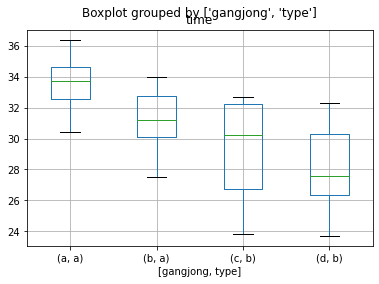

In [83]:
dat.boxplot(column = "time", by = ['gangjong', 'type'])

In [82]:
model = ols('time ~ C(gangjong) * C(type)', dat).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(gangjong),3.0,104.603333,34.867778,4.171868,0.019013
C(type),1.0,4.098794,4.098794,0.490413,0.491810
C(gangjong):C(type),3.0,17.262445,5.754148,0.688474,0.569645
Residual,20.0,167.156667,8.357833,NaN,NaN


- 강종의 유의확률 0.01 < 0.05이므로 귀무가설을 기각한다. 따라서, 강종의 종류 간 시간의 차이가 있다.
- type의 유의확률 0.49 > 0.05이므로 귀무가설을 채택한다. 따라서, type의 종류 간 시간의 차이가 없다.
- 강종과 type의 유의확률 0.56 > 0.05이므로 귀무가설을 채택한다. 따라서, 강종과 type의 종류 간 시간의 차이가 없다.

#### Python을 이용한 가설검정 실습 (330쪽)

In [86]:
dat = pd.DataFrame({'Strength' : [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,
                                  36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5],
                    'Temperature' : [14,15,14,16,17,14,17,16,15,16,
                                     14,16,18,13,15,17,14,16,20,21]})

print(dat.shape)
dat.head()

(20, 2)


,Strength,Temperature
0,37.6,14
1,38.6,15
2,37.2,14
3,36.4,16
4,38.6,17


In [87]:
corr, pval = stats.pearsonr(dat['Strength'], dat['Temperature'])

print("------- Correlation Analysis -------")
print("corr : {0:0.3f}".format(corr))
print("p-value : {0:0.3f}".format(pval))

------- Correlation Analysis -------
corr : -0.723
p-value : 0.000


- H0 : 초코칩의 강도와 재료 반죽온도 간 상관관계 = 0
- H1 : 초코칩의 강도와 재료 반죽온도 간 상관관계 != 0

유의확률 0.000 < 0.05이므로 귀무가설을 기각한다. 따라서, 초코칩의 강도와 재료 반죽온도 간 상관성이 있다. 두 변수는 약 -0.7의 양호한 음의 상관관계를 갖는 것으로 보인다.